Porovnanie očakávaných výstupov s predikovanými na trénovacích dátach po natrénovaní siete:
Očakávaný vstup: 
[[0.15 ]
 [0.07 ]
 [0.21 ]
 [0.155]
 [0.055]
 [0.12 ]
 [0.33 ]
 [0.26 ]
 [0.165]
 [0.32 ]
 [0.21 ]
 [0.135]
 [0.19 ]
 [0.205]
 [0.185]
 [0.24 ]
 [0.115]
 [0.13 ]
 [0.1  ]
 [0.115]
 [0.075]
 [0.085]
 [0.27 ]
 [0.2  ]
 [0.305]
 [0.3  ]
 [0.285]
 [0.28 ]
 [0.295]
 [0.2  ]
 [0.33 ]
 [0.46 ]
 [0.35 ]
 [0.455]
 [0.49 ]
 [0.125]
 [0.34 ]
 [0.145]
 [0.26 ]
 [0.09 ]
 [0.115]
 [0.27 ]
 [0.02 ]
 [0.012]
 [0.015]
 [0.075]
 [0.14 ]
 [0.15 ]
 [0.045]
 [0.245]]
Predikovaný vstup:
[[0.16]
 [0.08]
 [0.24]
 [0.16]
 [0.06]
 [0.14]
 [0.24]
 [0.25]
 [0.19]
 [0.26]
 [0.24]
 [0.14]
 [0.2 ]
 [0.25]
 [0.18]
 [0.21]
 [0.08]
 [0.15]
 [0.09]
 [0.16]
 [0.08]
 [0.1 ]
 [0.28]
 [0.26]
 [0.32]
 [0.27]
 [0.29]
 [0.29]
 [0.31]
 [0.28]
 [0.29]
 [0.36]
 [0.35]
 [0.36]
 [0.38]
 [0.17]
 [0.25]
 [0.16]
 [0.28]
 [0.08]
 [0.16]
 [0.26]
 [0.02]
 [0.01]
 [0.01]
 [0.11]
 [0.18]
 [0.17]
 [0.06]
 [0.24]]
Porovnanie očakávan

Text(0.5, 1.0, 'Vývoj chyby počas trénovania')

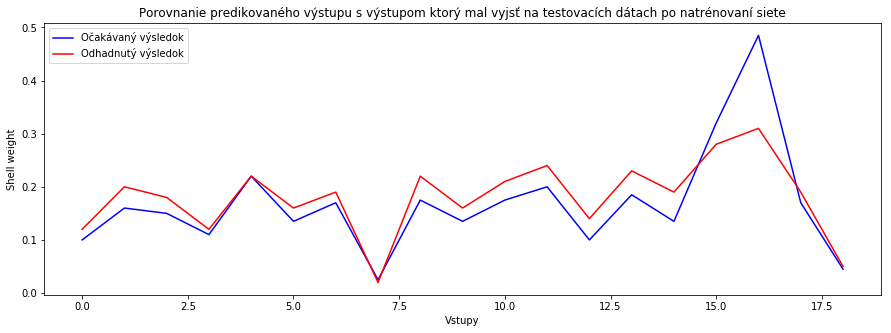

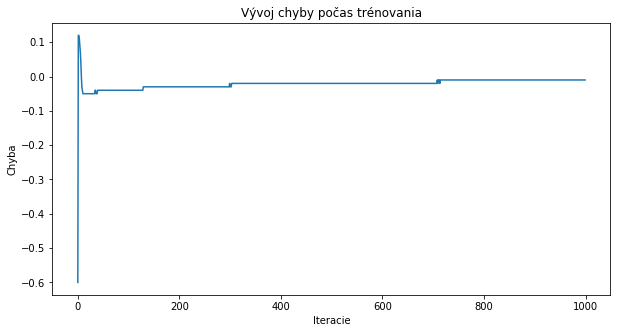

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class neural_network(object):
    def __init__(self):
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3
        
        #weights
        self.W1 = np.random.rand(self.inputSize, self.hiddenSize)
        self.W2 = np.random.rand(self.hiddenSize, self.outputSize)
        
    def forward(self, x): # feed forward algoritmus na predikovanie a vypocet vystupu siete
        self.z = np.dot(x, self.W1)
        self.z2 = self.sigmoid(self.z)
        self.z3 = np.dot(self.z2, self.W2)
        output = self.sigmoid(self.z3)
        output = np.round(output, 2)
        return output
    
    def backward(self, x, y, o): # spatny algoritmus pre vypocet chyb na jednotlivych neuronoch pre upravenie vah 
        self.o_error = y - o
        
        self.o_delta = self.o_error * self.sigmoidPrime(o) # na zaklade vystupu vynasobenej derivovanou funkciou sigmoid dostaneme velkost zmeny pre hladanie minima ktorou potom prenasobime prislusne vstupy
        
        self.z2_error = self.o_delta.dot(self.W2.T)
        
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        
        self.W1 += x.T.dot(self.z2_delta)
        self.W2 += self.z2.T.dot(self.o_delta)
        
    def train(self, x, y):
        o = self.forward(x)
        self.backward(x, y, o)
    
    def sigmoid(self, s):
        return 1/(1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def predict(self, x):
        return self.forward(x)
    
    
abalone = pd.read_csv('abalone.data', names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"])

x = abalone.drop(['Sex', 'Diameter', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'], axis = 1)[:50].values
y = abalone.iloc[0:50, [7]].values


NN = neural_network()
errors = []
for i in range(1000):
    NN.train(x, y)
    errors.append(NN.o_error[0])
    
print('Porovnanie očakávaných výstupov s predikovanými na trénovacích dátach po natrénovaní siete:')
print('Očakávaný vstup: \n' + str(y))
print('Predikovaný vstup:\n' + str(NN.predict(x)))

x_test = abalone.drop(['Sex', 'Diameter', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'], axis = 1)[51:70].values
y_test = abalone.iloc[51:70, [7]].values

print('Porovnanie očakávaných výstupov s predikovanými na testovacích dátach po natrénovaní siete:')
print('Očakávaný vstup: \n' + str(y_test))
print('Predikovaný vstup:\n' + str(NN.predict(x_test)))

print('Výpis chyby:')
for ele in errors:
    print(ele[0], end=' ')

plt.figure(figsize=(15, 5))
plt.title('Porovnanie predikovaného výstupu s výstupom ktorý mal vyjsť na testovacích dátach po natrénovaní siete')
plt.plot(y_test,'b', label='Očakávaný výsledok')
plt.plot(NN.predict(x_test),'r', label='Odhadnutý výsledok')
plt.xlabel('Vstupy')
plt.ylabel('Shell weight')
plt.legend(loc='upper left')

plt.figure(figsize=(10, 5))
#plt.subplot()
plt.plot(errors)
plt.xlabel('Iteracie')
plt.ylabel('Chyba')
plt.title('Vývoj chyby počas trénovania')